# Marketing Analytics
#    For
# E-Commerce Market Place Company

In [1]:
import numpy as np
import pandas as pd
from itertools import combinations
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
# import files:
cust = pd.read_csv('CUSTOMERS.csv')
order_pay = pd.read_csv('ORDER_PAYMENTS.csv')
geo = pd.read_csv('GEO_LOCATION.csv')
order_items = pd.read_csv('ORDER_ITEMS.csv')
order_review = pd.read_csv('ORDER_REVIEW_RATINGS.csv')
orders = pd.read_csv('ORDERS.csv')
products = pd.read_csv('PRODUCTS.csv')
sellers = pd.read_csv('SELLERS.csv')

In [3]:
# merging the datasets as per requirements based on flow chart:
cust_order =pd.merge(left=cust, right=orders, how="inner", on="customer_id")


In [4]:
a=pd.merge(left=cust_order, right=order_items, how="right", on="order_id")


In [5]:
b=pd.merge(left=a, right=order_pay, how="inner", on="order_id")


In [6]:
c=pd.merge(left=b, right=products, how="left", on="product_id")


In [7]:
d=pd.merge(left=c, right=order_review, how="left", on="order_id")

In [8]:
# final dataframe
df = pd.merge(left=d, right=sellers, how="left", on="seller_id")
df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,product_length_cm,product_height_cm,product_width_cm,review_id,review_score,review_creation_date,review_answer_timestamp,seller_zip_code_prefix,seller_city,seller_state
0,3ce436f183e68e07877b285a838db11a,871766c5855e863f6eccc05f988b23cb,28013,Guntakal,Andhra Pradesh,00010242fe8c5a6d1ba2dd792cb16214,delivered,9/13/2017 8:59,9/13/2017 9:45,9/19/2017 18:34,...,28.0,9.0,14.0,97ca439bc427b48bc1cd7177abe71365,5,9/21/2017 0:00,9/22/2017 10:57,27277,Serilingampalle,Andhra Pradesh
1,f6dd3ec061db4e3987629fe6b26e5cce,eb28e67c4c0b83846050ddfb8a35d051,15775,Kirandul,Chhattisgarh,00018f77f2f0320c557190d7a144bdd3,delivered,4/26/2017 10:53,4/26/2017 11:05,5/4/2017 14:35,...,50.0,30.0,40.0,7b07bacd811c4117b742569b04ce3580,4,5/13/2017 0:00,5/15/2017 11:34,3471,Akkarampalle,Andhra Pradesh
2,6489ae5e4333f3693df5ad4372dab6d3,3818d81c6709e39d06b2738a8d3a2474,35661,Kanker,Chhattisgarh,000229ec398224ef6ca0657da4fc703e,delivered,1/14/2018 14:33,1/14/2018 14:48,1/16/2018 12:36,...,33.0,13.0,33.0,0c5b33dea94867d1ac402749e5438e8b,5,1/23/2018 0:00,1/23/2018 16:06,37564,Goredi Chancha,Rajasthan
3,d4eb9395c8c0431ee92fce09860c5a06,af861d436cfc08b2c2ddefd0ba074622,12952,Patancheru,Andhra Pradesh,00024acbcdf0a6daa1e931b038114c75,delivered,8/8/2018 10:00,8/8/2018 10:10,8/10/2018 13:28,...,16.0,10.0,15.0,f4028d019cb58564807486a6aaf33817,4,8/15/2018 0:00,8/15/2018 16:39,14403,Adilabad,Andhra Pradesh
4,58dbd0b2d70206bf40e62cd34e84d795,64b576fb70d441e8f1b2d7d446e483c5,13226,Changanassery,Kerala,00042b26cf59d7ce69dfabb4e55b4fd9,delivered,2/4/2017 13:57,2/4/2017 14:10,2/16/2017 9:46,...,35.0,40.0,30.0,940144190dcba6351888cafa43f3a3a5,5,3/2/2017 0:00,3/3/2017 10:54,87900,Kumhari,Chhattisgarh


In [9]:
df.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'order_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'order_item_id', 'product_id',
       'seller_id', 'shipping_limit_date', 'price', 'freight_value',
       'payment_sequential', 'payment_type', 'payment_installments',
       'payment_value', 'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'review_id', 'review_score', 'review_creation_date',
       'review_answer_timestamp', 'seller_zip_code_prefix', 'seller_city',
       'seller_state'],
      dtype='object')

In [10]:
# drop extra not usefull columns
df=df.drop(columns=['order_approved_at','order_delivered_carrier_date','order_estimated_delivery_date',
                     'order_delivered_customer_date','shipping_limit_date','product_name_lenght',
                     'product_description_lenght','product_weight_g','product_length_cm','product_height_cm',
                     'product_height_cm','product_width_cm','review_creation_date','review_answer_timestamp'])

In [11]:
# treating with missing data using UDF:

def missing_var(x):
    if ((x.dtype == 'float') or (x.dtype == 'int')):
        x = x.fillna(x.median())
        
    elif x.dtype == 'object':
        x = x.fillna(x.mode()[0])
    
    else:
        x
    return (x)    

In [12]:
df = df.apply(missing_var)

In [13]:
df.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
order_id                    0
order_status                0
order_purchase_timestamp    0
order_item_id               0
product_id                  0
seller_id                   0
price                       0
freight_value               0
payment_sequential          0
payment_type                0
payment_installments        0
payment_value               0
product_category_name       0
product_photos_qty          0
review_id                   0
review_score                0
seller_zip_code_prefix      0
seller_city                 0
seller_state                0
dtype: int64

In [14]:
# change datatype of date:
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])

## 1. Perform Detailed exploratory analysis

### a. Define & calculate high level metrics like (Total Revenue, Total quantity, Total products, Total categories, Total sellers, Total locations, Total channels, Total payment methods etc…) 

In [15]:
print('Total Revenue:', df['payment_value'].sum())
print('Total quantity:', df['order_id'].nunique())
print('Total products:', df['product_id'].nunique())
print('Total categories:', df['product_category_name'].nunique())
print('Total sellers:', df['seller_id'].nunique())
print('Total locations:', df['customer_zip_code_prefix'].nunique())
print('Total payment methods:', df['payment_type'].nunique())

Total Revenue: 20418288.150000002
Total quantity: 98665
Total products: 32951
Total categories: 71
Total sellers: 3095
Total locations: 14976
Total payment methods: 4


### b. Understanding how many new customers acquired every month


In [16]:
#Extracting months from purchase date:
df['Month'] = df['order_purchase_timestamp'].dt.to_period('M')

In [17]:
x = pd.crosstab(df.Month, df.customer_id)

x.sum(axis = 1)

Month
2016-09       3
2016-10     386
2016-12       1
2017-01    1023
2017-02    2073
2017-03    3201
2017-04    2864
2017-05    4445
2017-06    3822
2017-07    4887
2017-08    5224
2017-09    5137
2017-10    5617
2017-11    9096
2017-12    6595
2018-01    8603
2018-02    8025
2018-03    8592
2018-04    8273
2018-05    8231
2018-06    7396
2018-07    7356
2018-08    7464
2018-09       1
Freq: M, dtype: int64

### c. Understand the retention of customers on month on month basis


In [18]:
df['customer_id'].nunique()

98665

### d. How the revenues from existing/new customers on month on month basis

In [19]:
df.groupby('Month')['payment_value'].sum()

Month
2016-09        347.52
2016-10      74773.54
2016-12         19.62
2017-01     189570.02
2017-02     346280.99
2017-03     529993.27
2017-04     506900.50
2017-05     730912.77
2017-06     605639.30
2017-07     741936.39
2017-08     878027.04
2017-09    1023361.16
2017-10    1035728.78
2017-11    1595006.04
2017-12    1046429.88
2018-01    1418478.51
2018-02    1322340.41
2018-03    1482224.09
2018-04    1499387.74
2018-05    1507872.59
2018-06    1298592.17
2018-07    1354550.94
2018-08    1229748.42
2018-09        166.46
Freq: M, Name: payment_value, dtype: float64

### e. Understand the trends/seasonality of sales, quantity by category, location, month, week, day, time, channel, payment method etc…

<AxesSubplot:xlabel='product_category_name'>

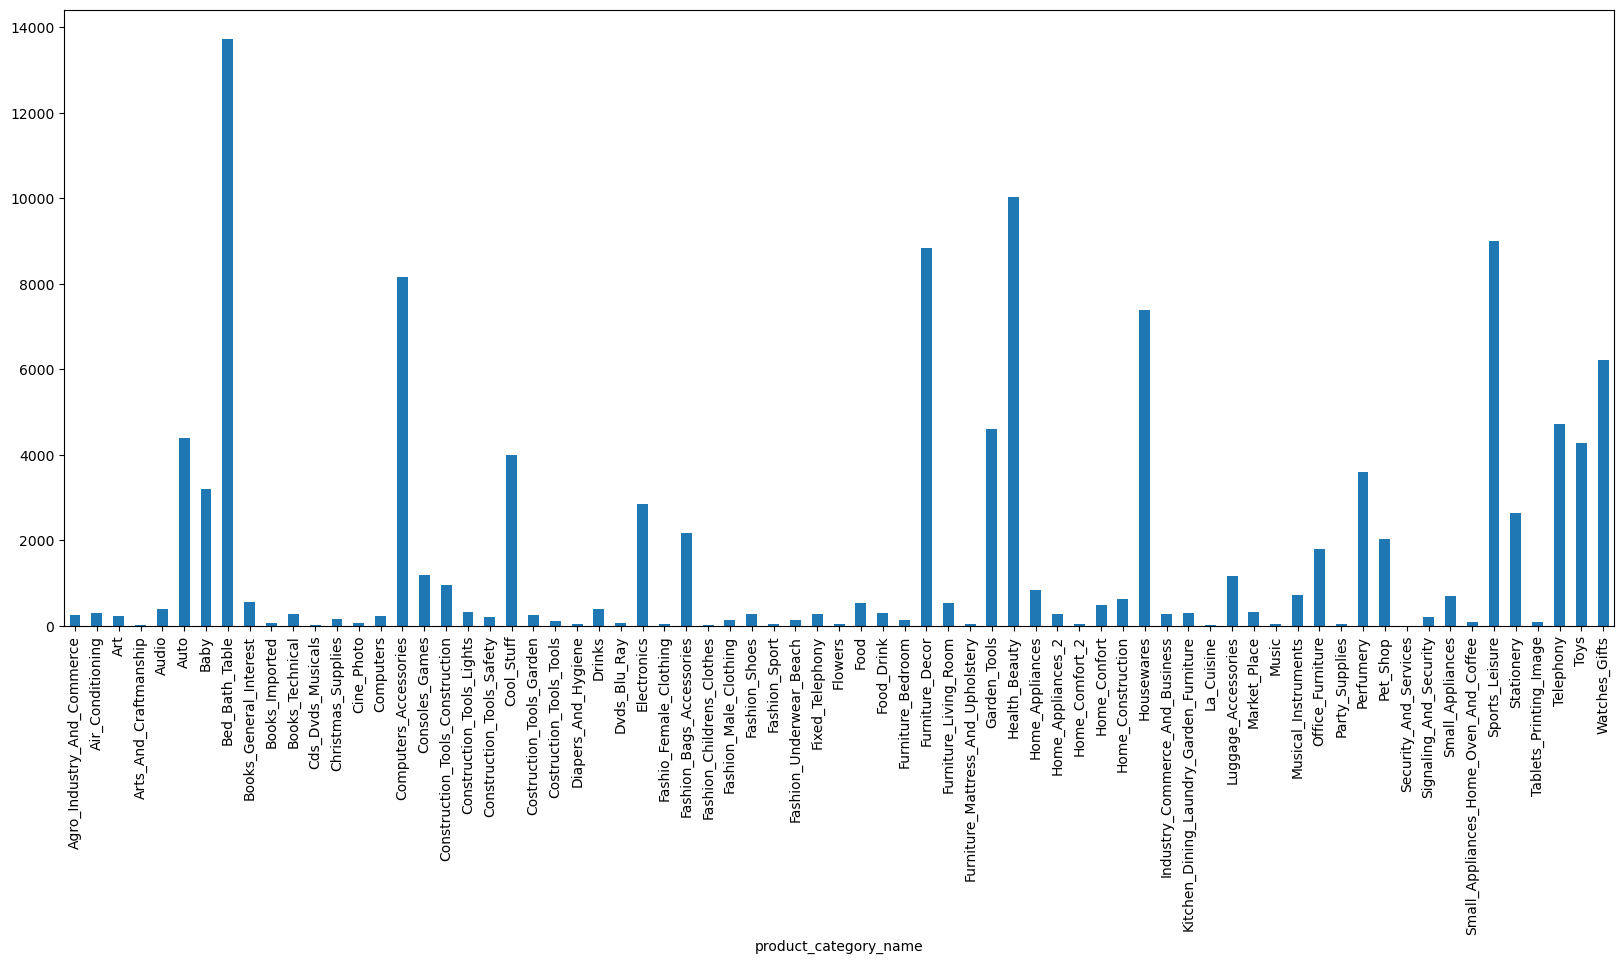

In [20]:
#ploting bar chart for prod category name and order id to understand trends of sales:
df.groupby('product_category_name')['order_id'].count().plot(kind = 'bar', figsize= (20,8))

<AxesSubplot:xlabel='customer_state'>

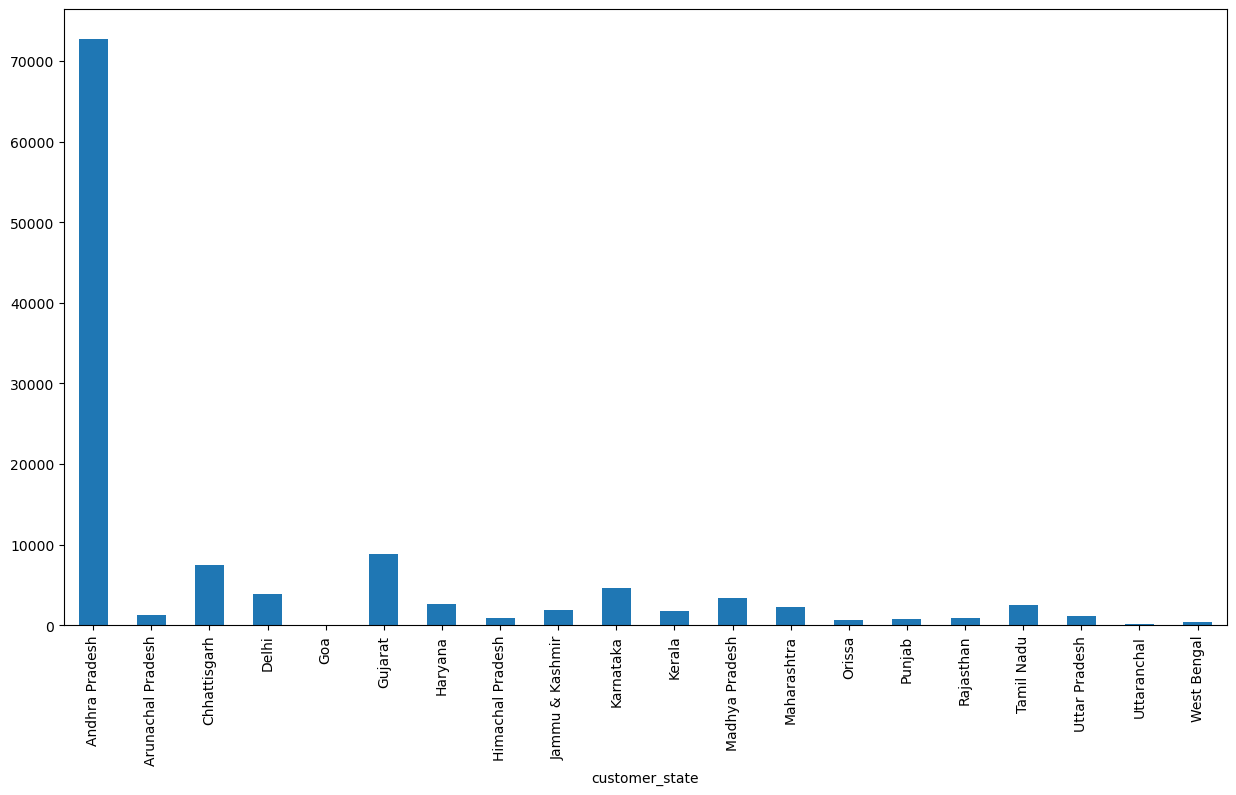

In [21]:
#ploting bar chart for customer state name and order id to understand trends of sales:
df.groupby('customer_state')['order_id'].count().plot(kind = 'bar', figsize= (15,8))

<AxesSubplot:xlabel='Month'>

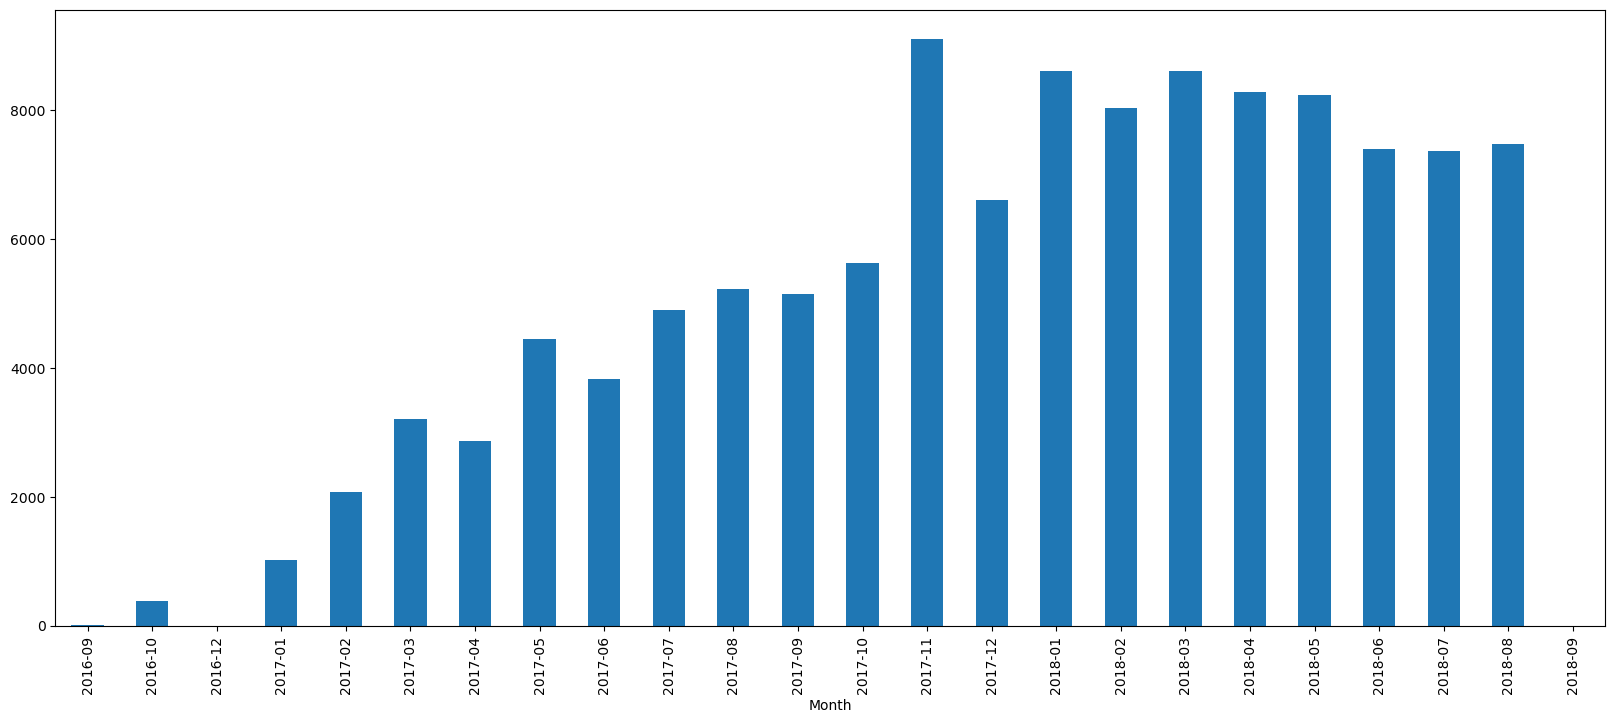

In [22]:
#ploting bar chart for time period name and order id to understand trends of sales:
df.groupby('Month')['order_id'].count().plot(kind = 'bar', figsize= (20,8))

<AxesSubplot:xlabel='payment_type'>

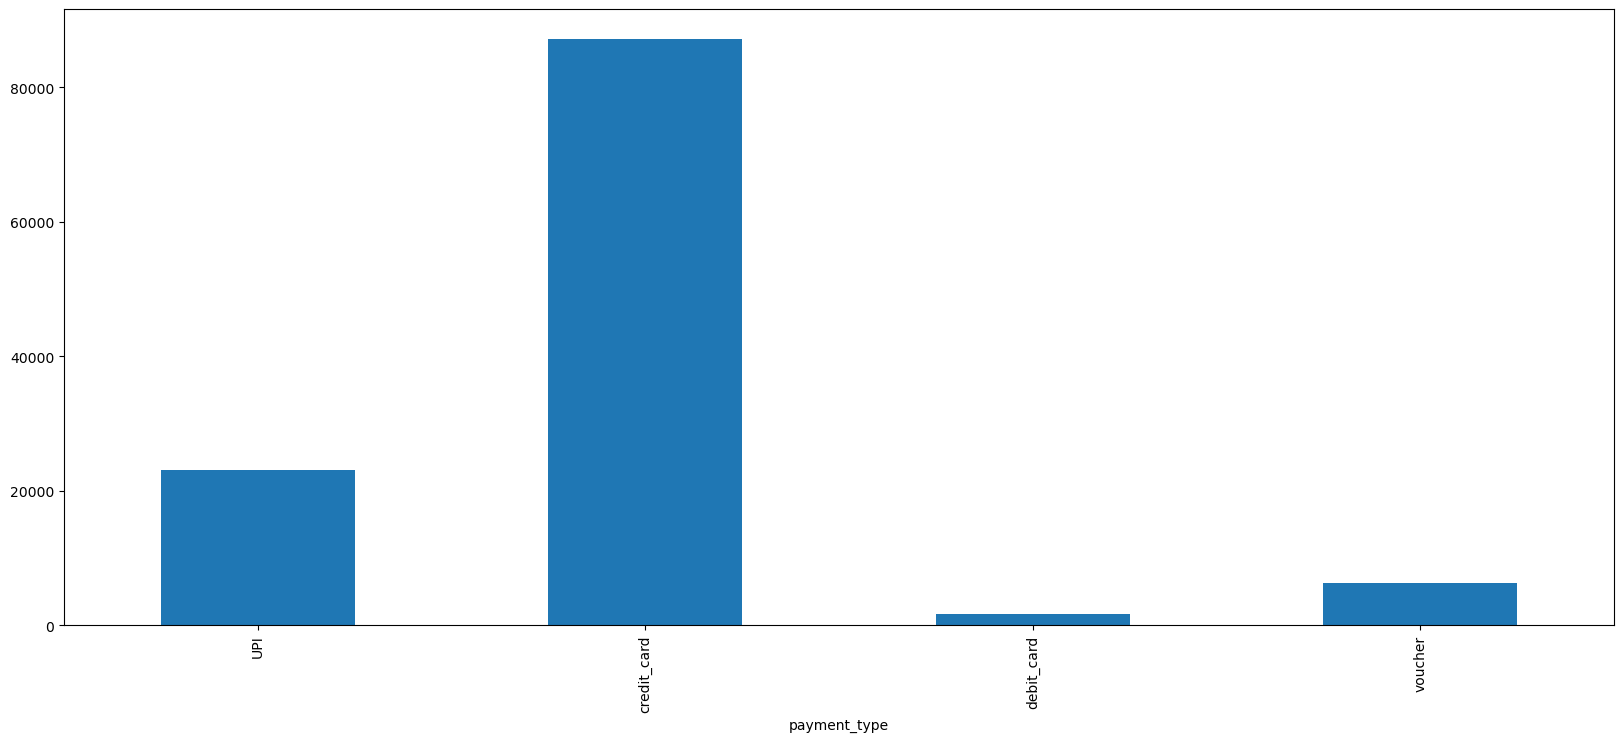

In [23]:
#ploting bar chart for payment method name and order id to understand trends of sales:
df.groupby('payment_type')['order_id'].count().plot(kind = 'bar', figsize= (20,8))

### f. Popular Products by month, seller, state, category.

In [24]:
#popular products on the basis of months
x = df.groupby(['Month',df.product_id.rename('product')]).product_id.count().reset_index().sort_values(by=
                                                        ['Month','product_id'],ascending=[True,False])
x = x.groupby('Month').head().reset_index(drop= True)
x

,Month,product,product_id
0,2016-09,c1488892604e4ba5cff5b4eb4d595400,1
1,2016-09,f293394c72c9b5fafd7023301fc21fc2,1
2,2016-09,f3c2d01a84c947b078e32bbef0718962,1
3,2016-10,eba7488e1c67729f045ab43fac426f2e,11
4,2016-10,85b99d83c60cab5b4d8f927ad35212a1,7
...,...,...,...
105,2018-08,73326828aa5efe1ba096223de496f596,56
106,2018-08,19c91ef95d509ea33eda93495c4d3481,32
107,2018-08,2bd9b51a9ab079e095aca987845d3266,29
108,2018-08,a92930c327948861c015c919a0bcb4a8,29


In [25]:
#popular products on the basis of sellers
x1 = df.groupby(['seller_id',df.product_id.rename('product')]).product_id.count().reset_index().sort_values(by=
                                                        ['product_id'],ascending=False)
x1 = x1.groupby('seller_id').head().reset_index(drop= True)
x1

,seller_id,product,product_id
0,955fee9216a65b617aa5c0531780ce60,aca2eb7d00ea1a7b8ebd4e68314663af,536
1,4a3ca9315b744ce9f8e9374361493884,99a4788cb24856965c36a24e339b6058,522
2,1f50f920176fa81dab994f9023523100,422879e10f46682990de24d770e7f83d,508
3,1f50f920176fa81dab994f9023523100,389d119b48cf3043d311335e499d9c6b,406
4,1f50f920176fa81dab994f9023523100,368c6c730842d78016ad823897a372db,398
...,...,...,...
10367,70849ca4f400aaabb62cb7462a6f1428,abf460fbe81f4b2741cd059df2925fff,1
10368,702835e4b785b67a084280efca355756,a9c404971d1a5b1cbc2e4070e02731fd,1
10369,70126eecc6aa1274392a1743866e9678,3a96bcbf644a5d390107570628568026,1
10370,70125af26c2d6d4ef401a1d02ae7701f,4ce99ff9dcb7821acd8e599d5d4a6531,1


In [26]:
#popular products on the basis of state
x1 = df.groupby(['customer_state',df.product_id.rename('product')]).product_id.count().reset_index().sort_values(by=
                                                        ['product_id'],ascending=False)
x1 = x1.groupby('customer_state').head().reset_index(drop= True)
x1

,customer_state,product,product_id
0,Andhra Pradesh,aca2eb7d00ea1a7b8ebd4e68314663af,346
1,Andhra Pradesh,99a4788cb24856965c36a24e339b6058,322
2,Andhra Pradesh,422879e10f46682990de24d770e7f83d,302
3,Andhra Pradesh,389d119b48cf3043d311335e499d9c6b,226
4,Andhra Pradesh,53b36df67ebb7c41585e8d54d6772e08,226
...,...,...,...
95,Goa,bfc275f6de912665e4dcd8da32f43c10,1
96,Goa,d9c2eaccfa617895e2720f212e592de1,1
97,Goa,dd231637766e756fd1cf2fd80501fce1,1
98,Goa,b99e4f4fa3f421e0ffbd512d9f152dec,1


In [27]:
#popular products on the basis of category
x1 = df.groupby(['product_category_name',df.product_id.rename('product')]).product_id.count().reset_index().sort_values(by=
                                                        ['product_id'],ascending=False)
x1 = x1.groupby('product_category_name').head().reset_index(drop= True)
x1

,product_category_name,product,product_id
0,Furniture_Decor,aca2eb7d00ea1a7b8ebd4e68314663af,536
1,Bed_Bath_Table,99a4788cb24856965c36a24e339b6058,528
2,Garden_Tools,422879e10f46682990de24d770e7f83d,508
3,Garden_Tools,389d119b48cf3043d311335e499d9c6b,406
4,Garden_Tools,368c6c730842d78016ad823897a372db,398
...,...,...,...
343,Home_Comfort_2,4fb3bad6b502eaca3b6d7d87bc1613a4,1
344,Home_Comfort_2,2072d4792ab7893ddbfc178948e0eb86,1
345,Fashion_Childrens_Clothes,0ab3ab3b2869073aa9afe795fe9151aa,1
346,Fashion_Childrens_Clothes,2b18330ce86ae5c606250b75b499f370,1


### g. Popular categories by state, month

In [28]:
#popular categories by state:
y = df.groupby(['customer_state',df.product_category_name.rename('cat_name')]).product_category_name.count().reset_index().sort_values(by=
                                                                        ['customer_state','product_category_name'],ascending=[True,False])
y = y.groupby('customer_state').head(5).reset_index(drop=True)
y

,customer_state,cat_name,product_category_name
0,Andhra Pradesh,Bed_Bath_Table,8880
1,Andhra Pradesh,Health_Beauty,6231
2,Andhra Pradesh,Furniture_Decor,5579
3,Andhra Pradesh,Sports_Leisure,5568
4,Andhra Pradesh,Computers_Accessories,5067
...,...,...,...
95,West Bengal,Health_Beauty,45
96,West Bengal,Bed_Bath_Table,40
97,West Bengal,Telephony,34
98,West Bengal,Computers_Accessories,33


In [29]:
#popular categories by month:
y = df.groupby(['Month',df.product_category_name.rename('cat_name')]).product_category_name.count().reset_index().sort_values(by=
                                                                        ['Month','product_category_name'],ascending=[True,False])
y = y.groupby('Month').head(5).reset_index(drop=True)
y

,Month,cat_name,product_category_name
0,2016-09,Furniture_Decor,2
1,2016-09,Telephony,1
2,2016-10,Furniture_Decor,80
3,2016-10,Health_Beauty,50
4,2016-10,Perfumery,36
...,...,...,...
104,2018-08,Bed_Bath_Table,714
105,2018-08,Housewares,650
106,2018-08,Sports_Leisure,481
107,2018-08,Furniture_Decor,461


### h. List top 10 most expensive products sorted by price

In [30]:
df.groupby('product_id')['payment_value'].sum().reset_index().sort_values('payment_value', ascending = False)

,product_id,payment_value
11352,5769ef0a239114ac3a854af00df129e4,109312.64
24086,bb50f2e236e5eea0100680137654686c,82226.19
8613,422879e10f46682990de24d770e7f83d,80151.10
27039,d1c427060a0f73f6b889a5c7c61f2ac4,70557.90
14068,6cdd53843498f92890544667809f1595,64825.67
...,...,...
10782,5304ff3fa35856a156e1170a6022d34d,12.22
13461,680cc8535be7cc69544238c1d6a83fe8,11.62
1958,0eeeb45e2f5911fd44282e5bb0c624ff,11.56
6388,310dc32058903b6416c71faff132df9e,10.07


## 2. Performing Customers/sellers Segmentation

   ### a. Divide the customers into groups based on the revenue generated

In [31]:
#create groups on the basis of payment_value
df['revenue_group'] = np.where(df["payment_value"]<2000,1,(np.where(df["payment_value"]<4000,2,
                                     np.where(df["payment_value"]<6000,3,(np.where(df["payment_value"]<8000,4,
                                    (np.where(df["payment_value"]<10000,5,(np.where(df["payment_value"]<12000,6,7))))))))))

In [32]:
df.groupby(['revenue_group','customer_id'])['payment_value'].sum()

revenue_group  customer_id                     
1              00012a2ce6f8dcda20d059ce98491703       114.74
               000161a058600d5901f007fab4c27140        67.41
               0001fd6190edaaf884bcaf3d49edf079       195.42
               0002414f95344307404f0ace7a26f1d5       179.35
               000379cdec625522490c315e70c7a9fb       107.01
                                                     ...    
4              3fd6777bbce08a352fddd04e4a7cc8f6      6726.66
               c6e2731c5b391845f6800c97401a43a9      6929.31
               ec5b2ba62e574342386871631fafd3fc     29099.52
               f48d464a0baaea338cb25f816991ab1f      6922.21
7              1617b1357756262bfa56ab541c47bc16    109312.64
Name: payment_value, Length: 98670, dtype: float64

### b. Divide the sellers into groups based on the revenue generated 

In [33]:
df.groupby(['revenue_group','seller_id'])['payment_value'].sum()

revenue_group  seller_id                       
1              0015a82c2db000af6aaaf3ae2ecb0532      2748.06
               001cca7ae9ae17fb1caed9dfb1094831     48349.22
               001e6ad469a905060d959994f1b41e4f       267.94
               002100f778ceb8431b7a1020ff7ab48f      2478.33
               003554e2dce176b5555353e4f3555ac8       139.38
                                                     ...    
4              b37c4c02bda3161a7546a4e6d222d5b2     29099.52
               e3b4998c7a498169dc7bce44e6bb6277      6929.31
               ee27a8f15b1dded4d213a468ba4eb391      6726.66
               f08a5b9dd6767129688d001acafc21e5     36489.24
7              b37c4c02bda3161a7546a4e6d222d5b2    109312.64
Name: payment_value, Length: 3191, dtype: float64

## 3. Cross-Selling (Which products are selling together)
##     Hint: We need to find which of the top 10 combinations of products are selling      together in each transaction. (combination of 2 or 3 buying together)

In [34]:
df.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'order_id', 'order_status',
       'order_purchase_timestamp', 'order_item_id', 'product_id', 'seller_id',
       'price', 'freight_value', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'product_category_name',
       'product_photos_qty', 'review_id', 'review_score',
       'seller_zip_code_prefix', 'seller_city', 'seller_state', 'Month',
       'revenue_group'],
      dtype='object')

In [35]:
# Assuming the data is available in the Order_Items table with columns 'order_id' and 'product_category_name'

# Group the data at the order level and aggregate the product names as a list
order_items = df.groupby('order_id')['product_category_name'].apply(list)

In [36]:
# Generate combinations of 2 and 3 products for each order
combinations_2 = order_items.apply(lambda x: list(combinations(x, 2)))
combinations_3 = order_items.apply(lambda x: list(combinations(x, 3)))

In [37]:
# Count the occurrences of each combination
count_2 = Counter([item for sublist in combinations_2 for item in sublist])
count_3 = Counter([item for sublist in combinations_3 for item in sublist])

In [38]:
# Get the top 10 combinations
top_10_combinations_2 = count_2.most_common(10)
top_10_combinations_3 = count_3.most_common(10)

In [39]:
# Assuming the data is available at the customer and seller level with columns 'customer_id', 'revenue' in the Customers and Sellers tables

# Combine revenue from Orders table for each customer
customer_revenue = df.groupby('customer_id')['payment_value'].sum()

In [40]:
customer_revenue

customer_id
00012a2ce6f8dcda20d059ce98491703    114.74
000161a058600d5901f007fab4c27140     67.41
0001fd6190edaaf884bcaf3d49edf079    195.42
0002414f95344307404f0ace7a26f1d5    179.35
000379cdec625522490c315e70c7a9fb    107.01
                                     ...  
fffcb937e9dd47a13f05ecb8290f4d3e     91.91
fffecc9f79fd8c764f843e9951b11341     81.36
fffeda5b6d849fbd39689bb92087f431     63.13
ffff42319e9b2d713724ae527742af25    214.13
ffffa3172527f765de70084a7e53aae8     91.00
Name: payment_value, Length: 98665, dtype: float64

In [41]:
# Divide customers into groups based on revenue using deciles
customer_segments = pd.qcut(customer_revenue, 10, labels=False)

In [42]:
# Combine revenue from Orders table for each seller
seller_revenue = df.groupby('seller_id')['payment_value'].sum()

In [43]:
# Divide sellers into groups based on revenue using deciles
seller_segments = pd.qcut(seller_revenue, 10, labels=False)

In [44]:
seller_segments.head(15)

seller_id
0015a82c2db000af6aaaf3ae2ecb0532    6
001cca7ae9ae17fb1caed9dfb1094831    9
001e6ad469a905060d959994f1b41e4f    2
002100f778ceb8431b7a1020ff7ab48f    6
003554e2dce176b5555353e4f3555ac8    1
004c9cd9d87a3c30c522c48c4fc07416    9
00720abe85ba0859807595bbf045a33b    6
00ab3eff1b5192e5f1a63bcecfee11c8    0
00d8b143d12632bad99c0ad66ad52825    1
00ee68308b45bc5e2660cd833c3f81cc    9
00fc707aaaad2d31347cf883cd2dfe10    9
010543a62bd80aa422851e79a3bc7540    5
010da0602d7774602cd1b3f5fb7b709e    7
011b0eaba87386a2ae96a7d32bb531d1    2
01266d4c46afa519678d16a8b683d325    1
Name: payment_value, dtype: int64

## 4. Payment Behaviour

### a. How customers are paying?

In [45]:
df['payment_type'].unique()

array(['credit_card', 'UPI', 'voucher', 'debit_card'], dtype=object)

### b. Which payment channels are used by most customers?


In [46]:
df.groupby('payment_type')['customer_id'].count().reset_index().sort_values('customer_id', ascending = False)

,payment_type,customer_id
1,credit_card,87266
0,UPI,23018
3,voucher,6332
2,debit_card,1699


## 5. Customer satisfaction towards category & product

### a. Which categories (top 10) are maximum rated & minimum rated?

In [47]:
#top 10 categories maximum rated:
df.groupby('product_category_name')['review_score'].mean().reset_index().sort_values('review_score', ascending= False).head(10).reset_index(drop= True)

,product_category_name,review_score
0,Cds_Dvds_Musicals,4.642857
1,Fashion_Childrens_Clothes,4.500000
2,Books_General_Interest,4.431858
3,Books_Imported,4.419355
4,Books_Technical,4.345588
5,Costruction_Tools_Tools,4.333333
6,Small_Appliances_Home_Oven_And_Coffee,4.320513
7,Food_Drink,4.312715
8,Luggage_Accessories,4.290628
9,Fashion_Sport,4.258065


In [48]:
#top 10 categories minimum rated:
df.groupby('product_category_name')['review_score'].mean().reset_index().sort_values('review_score', ascending= True).head(10).reset_index(drop= True)

,product_category_name,review_score
0,Security_And_Services,2.500000
1,Diapers_And_Hygiene,3.256410
2,Home_Comfort_2,3.387097
3,Office_Furniture,3.516779
4,Fashion_Male_Clothing,3.531034
5,Fixed_Telephony,3.661765
6,Fashio_Female_Clothing,3.780000
7,Furniture_Mattress_And_Upholstery,3.804878
8,Audio,3.824147
9,Construction_Tools_Safety,3.834171


### b. Which products (top10) are maximum rated & minimum rated?

In [49]:
#top 10 products maximum rated:
df.groupby('product_id')['review_score'].mean().reset_index().sort_values('review_score', ascending= False).head(10).reset_index(drop= True)

,product_id,review_score
0,00066f42aeeb9f3007548bb9d3f33c38,5.0
1,86743ff92eee3d16b7df59cddd583b8c,5.0
2,868ceb027ab706a4dee42e2220006b85,5.0
3,868969d3a93aeeab7bfcd4fc3d3d65de,5.0
4,868766ed2172644fdd977d6bd395a107,5.0
5,8684bd8f93b4f4038d07188a23811e93,5.0
6,867c96d2bb67aba6500a4c509cf76072,5.0
7,867b820367ec206b38a357f2c12454b7,5.0
8,867901d7e8488fb97f1fb538c09d476e,5.0
9,865bfa00c1dad8f4146d3c2765f051ca,5.0


In [50]:
#top 10 products minimum rated:
df.groupby('product_id')['review_score'].mean().reset_index().sort_values('review_score', ascending= True).head(10).reset_index(drop= True)

,product_id,review_score
0,592cc6634d2c783d297effc0b828bc37,1.0
1,482c25dc8512547962854dfff5ac057b,1.0
2,e10c5041c0752194622a7a7016d8c9b5,1.0
3,47fafa6908e75ae62b8a36a9eb3b9234,1.0
4,47d85e3e35a3e29f93fdc12b295d520c,1.0
5,47d6209a0b169cc800b0a45a9127d2f2,1.0
6,47cad419b0ad5dc9d2305bf795c3c16f,1.0
7,47b49b876c60eafde72f0e1c602f386d,1.0
8,47b0f8596ee6dafbb4438cac16fa6275,1.0
9,47ac4dcdb04867daeaad647d224389e4,1.0


### c. Average rating by location, seller, product, category, month etc.¶

In [51]:
#Average rating by location
df.groupby('customer_city')['review_score'].mean().reset_index().sort_values('review_score', ascending= False).reset_index(drop= True)

,customer_city,review_score
0,Ghagga,5.0
1,Guru Har Sahai,5.0
2,Gursahaiganj,5.0
3,Singoli,5.0
4,Naranapuram,5.0
...,...,...
4105,Hyderabad,1.0
4106,Hajipur,1.0
4107,Singahi Bhiraura,1.0
4108,Velur,1.0


In [52]:
#Average rating by seller
df.groupby('seller_id')['review_score'].mean().reset_index().sort_values('review_score', ascending= False).reset_index(drop= True)

,seller_id,review_score
0,c18309219e789960add0b2255ca4b091,5.0
1,2075d8cd4dd63ff12df0749a5866bb06,5.0
2,40ec8ab6cdafbcc4f544da38c67da39a,5.0
3,4125d9385a25e82d2f72d3a0fd55bc3f,5.0
4,417a1e6c7321084d2a0ae0d023cfad93,5.0
...,...,...
3090,f524ad65d7e0f1daab730ef2d2e86196,1.0
3091,749e7cdabbaf72f16677859e27874ba5,1.0
3092,f5403d3f50089112c4eed37928b7f622,1.0
3093,dadc51ef321949ec9a3ab25cd902e23d,1.0


In [53]:
#Average rating by products
df.groupby('product_id')['review_score'].mean().reset_index().sort_values('review_score', ascending= False).reset_index(drop= True)

,product_id,review_score
0,00066f42aeeb9f3007548bb9d3f33c38,5.0
1,86743ff92eee3d16b7df59cddd583b8c,5.0
2,868ceb027ab706a4dee42e2220006b85,5.0
3,868969d3a93aeeab7bfcd4fc3d3d65de,5.0
4,868766ed2172644fdd977d6bd395a107,5.0
...,...,...
32946,984a3b9f9bb4c8feb319da951212696e,1.0
32947,149c06c0927fb59eff16690d31497f12,1.0
32948,628cfb8a45c95a7b796ea06b006e9384,1.0
32949,0a56efd5f050d3f861a04c6f005d1128,1.0


In [54]:
#Average rating by category
df.groupby('product_category_name')['review_score'].mean().reset_index().sort_values('review_score', ascending= False).reset_index(drop= True)

,product_category_name,review_score
0,Cds_Dvds_Musicals,4.642857
1,Fashion_Childrens_Clothes,4.500000
2,Books_General_Interest,4.431858
3,Books_Imported,4.419355
4,Books_Technical,4.345588
...,...,...
66,Fashion_Male_Clothing,3.531034
67,Office_Furniture,3.516779
68,Home_Comfort_2,3.387097
69,Diapers_And_Hygiene,3.256410


In [55]:
#Average rating by Months
df.groupby('Month')['review_score'].mean().reset_index().sort_values('review_score', ascending= False).reset_index(drop= True)

,Month,review_score
0,2016-12,5.000000
1,2018-07,4.209897
2,2018-08,4.205520
3,2017-08,4.202527
4,2018-06,4.177258
5,2017-09,4.125560
6,2018-05,4.119670
7,2017-06,4.117216
8,2017-05,4.117210
9,2017-07,4.108042
